<a href="https://colab.research.google.com/github/Arther91/Karia/blob/master/RNRS420.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Sun Nov 19 08:43:27 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   32C    P8     9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

if ram_gb < 20:
  print('Not using a high-RAM runtime')
else:
  print('You are using a high-RAM runtime!')

Your runtime has 54.8 gigabytes of available RAM

You are using a high-RAM runtime!


Project: Real Time Diabetic Retinopathy detection using CNN

Dataset: https://www.kaggle.com/datasets/sovitrath/diabetic-retinopathy-224x224-gaussian-filtered



Author: Samiul Bari

**Importing All Necessary Modules and Packages**

In [ ]:
!pip install opendatasets
!pip install pandas

In [ ]:
%cd /content/drive/MyDrive/Dnet


/content/drive/MyDrive/Dnet


In [ ]:
import opendatasets as od
import pandas

# od.download("https://www.kaggle.com/datasets/sovitrath/diabetic-retinopathy-224x224-gaussian-filtered") #f71ee8768a1e1d2d75715e68b2b7fd41

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
from PIL import Image
import seaborn as sns
import matplotlib.pyplot as plt
import PIL
import plotly
import plotly.express as px

from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten,Input,ZeroPadding2D,BatchNormalization,Activation
from tensorflow.keras.metrics import BinaryAccuracy, Precision, Recall
from tensorflow.keras.layers.experimental import preprocessing

from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings("ignore")

**Importing the dataset**

In [ ]:
#Locate the file in Personal Machine
path = 'diabetic-retinopathy-224x224-gaussian-filtered/gaussian_filtered_images/gaussian_filtered_images'

In [ ]:
No_DR_Img = os.listdir(path + '/No_DR/')
Mild_Img = os.listdir(path + '/Mild/')
Moderate_Img = os.listdir(path + '/Moderate/')
Proliferate_DR_Img = os.listdir(path + '/Proliferate_DR/')
Severe_Img = os.listdir(path + '/Severe/')

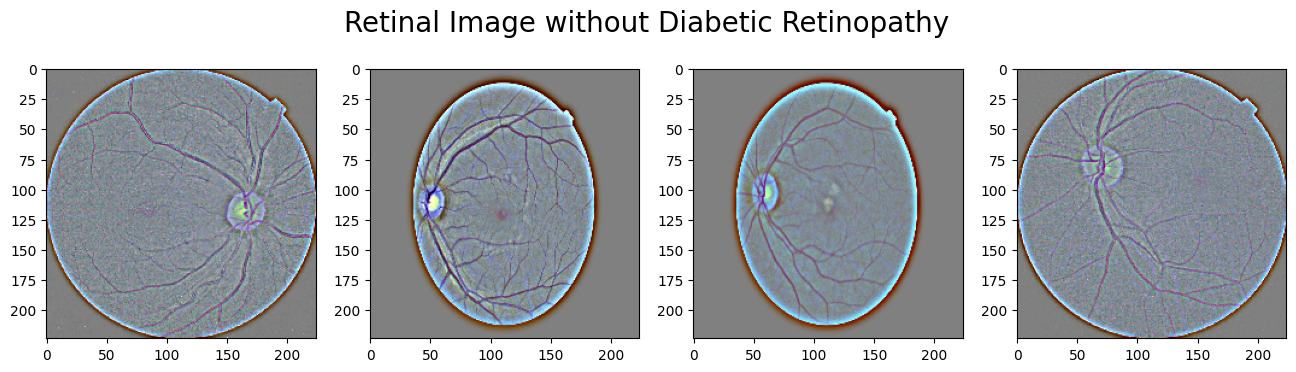

In [ ]:
#Viewing the dataset
fig = plt.figure(figsize=(16,4))
for i in range(4):
    plt.subplot(1, 4, i+1)
    img = cv2.imread(path+'/No_DR/'+ No_DR_Img[i])
    plt.imshow(img)
plt.suptitle("Retinal Image without Diabetic Retinopathy",fontsize=20)
plt.show()

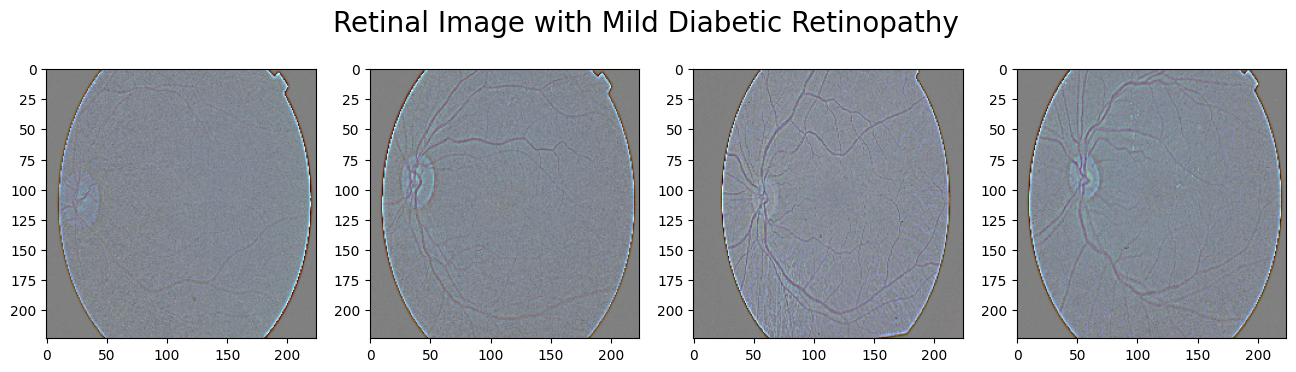

In [ ]:
#Viewing the dataset
fig = plt.figure(figsize=(16,4))
for i in range(4):
    plt.subplot(1, 4, i+1)
    img = cv2.imread(path+'/Mild/'+ Mild_Img[i])
    plt.imshow(img)
plt.suptitle("Retinal Image with Mild Diabetic Retinopathy",fontsize=20)
plt.show()

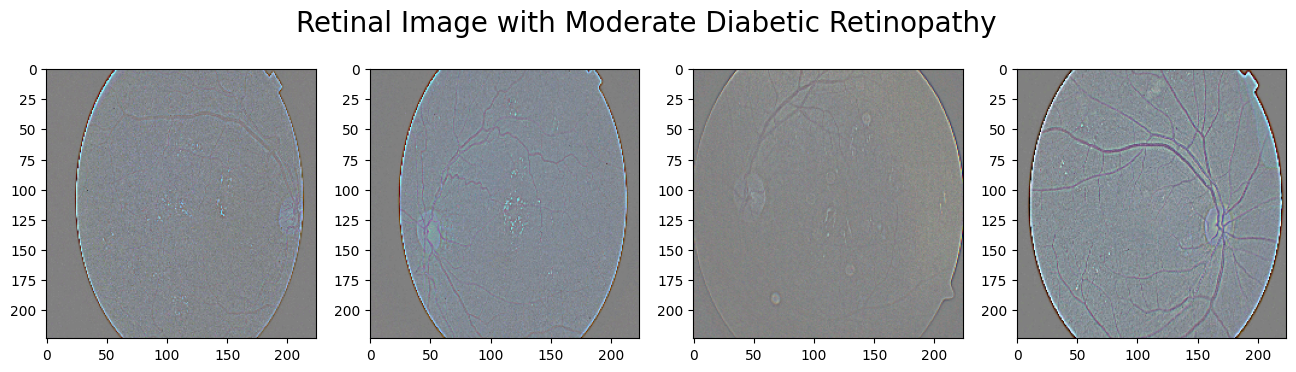

In [ ]:
#Viewing the dataset
fig = plt.figure(figsize=(16,4))
for i in range(4):
    plt.subplot(1, 4, i+1)
    img = cv2.imread(path+'/Moderate/'+ Moderate_Img[i])
    plt.imshow(img)
plt.suptitle("Retinal Image with Moderate Diabetic Retinopathy",fontsize=20)
plt.show()

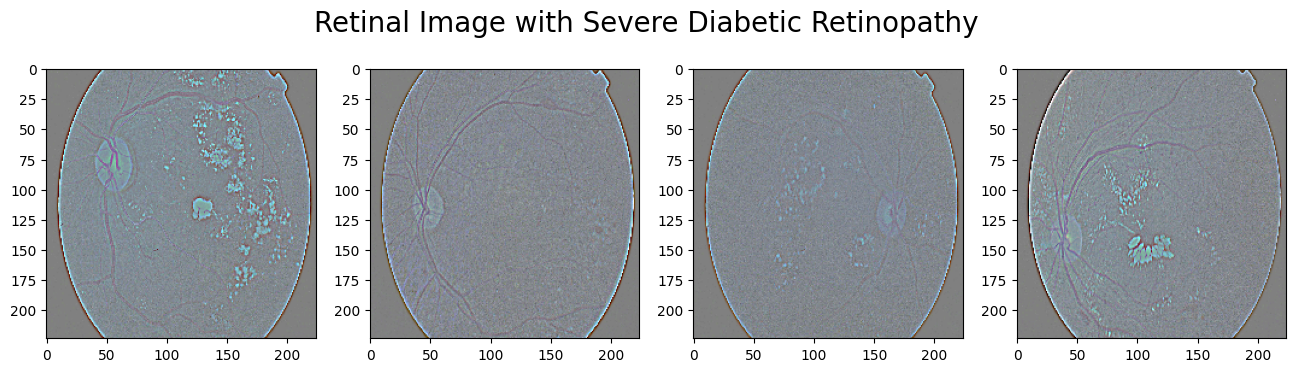

In [ ]:
#Viewing the dataset
fig = plt.figure(figsize=(16,4))
for i in range(4):
    plt.subplot(1, 4, i+1)
    img = cv2.imread(path+'/Severe/'+ Severe_Img[i])
    plt.imshow(img)
plt.suptitle("Retinal Image with Severe Diabetic Retinopathy",fontsize=20)
plt.show()

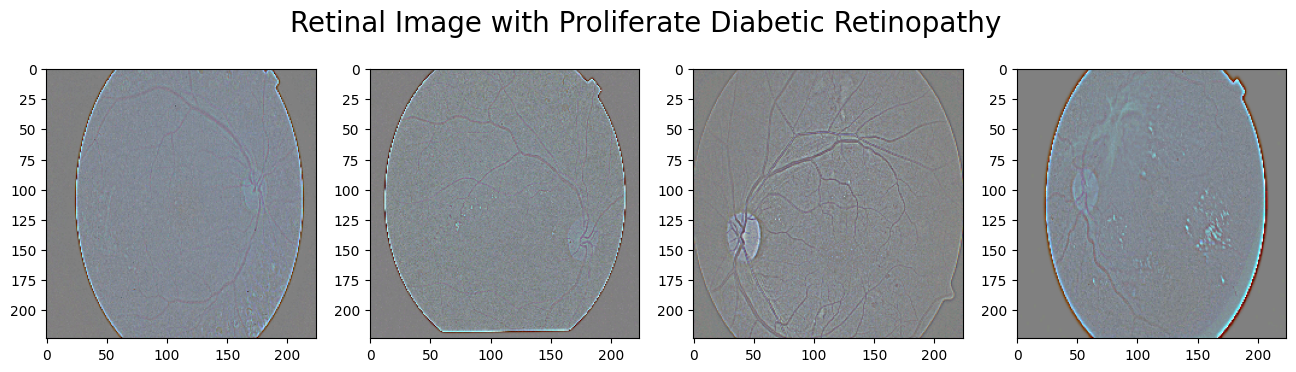

In [ ]:
#Viewing the dataset
fig = plt.figure(figsize=(16,4))
for i in range(4):
    plt.subplot(1, 4, i+1)
    img = cv2.imread(path+'/Proliferate_DR/'+ Proliferate_DR_Img[i])
    plt.imshow(img)
plt.suptitle("Retinal Image with Proliferate Diabetic Retinopathy",fontsize=20)
plt.show()

In [ ]:
Classes = {'No_DR':0, 'Mild':1, 'Moderate':2, 'Severe':3, 'Proliferate_DR':4}

**Data PreProcessing**

In [ ]:
#Normalizing pixel values
X = []
y = []
for i in Classes:
    folder_path ='diabetic-retinopathy-224x224-gaussian-filtered/gaussian_filtered_images/gaussian_filtered_images/' +i
    for j in os.listdir(folder_path):
        img = cv2.imread(folder_path+'/'+j)
        # normalize values
        img = img / 255  #-->Apply normalization because we want pixel values to be scaled to the range 0-1
        X.append(img)
        y.append(Classes[i])

In [ ]:
X = np.array(X)
y = np.array(y)

X.shape, y.shape

((3662, 224, 224, 3), (3662,))

**Dataset Analysis**

In [ ]:
#Class division

Class_series=pd.Series(y)
lis=["No_DR","Mild","Moderate","Severe","Proliferate_DR"]
DR_or_not = Class_series.value_counts().tolist()
values = [DR_or_not[0], DR_or_not[1], DR_or_not[2], DR_or_not[3], DR_or_not[4]]
fig = px.pie(values=Class_series.value_counts(), names=lis , width=800, height=400, color_discrete_sequence=["skyblue","black","pink","purple","blue"]
             ,title="percentage among the different Severities of DR")
fig.show()

In [ ]:
from imblearn.over_sampling import SMOTE
#Using SMOTE to oversample the minority class(Edema) to avoid class imbalance
sm = SMOTE(random_state = 2)
sm = SMOTE(random_state = 2)
X, y = sm.fit_resample(X.reshape(X.shape[0], -1), y.ravel())

In [ ]:
#Class division

Class_series=pd.Series(y)
lis=["No_DR","Mild","Moderate","Severe","Proliferate_DR"]
DR_or_not = Class_series.value_counts().tolist()
values = [DR_or_not[0], DR_or_not[1], DR_or_not[2], DR_or_not[3], DR_or_not[4]]
fig = px.pie(values=Class_series.value_counts(), names=lis , width=800, height=400, color_discrete_sequence=["skyblue","black","pink","purple","blue"]
             ,title="percentage among the different Severities of DR")
fig.show()

In [ ]:
X = X.reshape(X.shape[0], 224, 224, 3)

In [ ]:
# Used to clean up the memory to get rid of gurbage data
import gc
gc.collect()

13536

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=32, stratify=y)
#used stratify to balance the number of examples for each class

In [ ]:
X_train.shape

(7220, 224, 224, 3)

In [ ]:
X_test.shape

(1805, 224, 224, 3)

In [ ]:
X_train = X_train.reshape( (-1,224,224,3))
X_test = X_test.reshape((-1,224,224,3))

**Import the Model Architecture (VGG 16)**

In [ ]:
# from tensorflow.keras.applications.densenet import DenseNet121

In [ ]:
# vgg = DenseNet121(input_shape=(224,224,3),weights='imagenet',include_top=False)
import tensorflow as tf
vgg = tf.keras.applications.resnet_rs.ResNetRS420(
    weights='imagenet',
    input_shape=(224, 224, 3),
    include_top=False
)

In [ ]:
# # vgg = DenseNet121(input_shape=(224,224,3),weights='imagenet',include_top=False)
# import tensorflow as tf
# vgg = tf.keras.applications.resnet_rs.ResNetRS270(
#     weights='imagenet',
#     input_shape=(224, 224, 3),
#     include_top=False
# )

371171328/515221032 [====================>.........] - ETA: 4s

KeyboardInterrupt: ignored

In [ ]:
vgg.trainable = True

set_trainable = False

for layer in vgg.layers:
    if layer.name == 'conv5_block16_0_bn':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

In [ ]:
for layer in vgg.layers[:]:
  if ('bn' in layer.name):
    trainable = False

In [ ]:
from tensorflow.keras.layers import Dense,Flatten,Input,Dropout,Activation,BatchNormalization,Lambda

In [ ]:
x = Flatten()(vgg.output)
x = tf.keras.layers.Dense(128,activation='relu')(x)
x = tf.keras.layers.Dropout(0.4)(x)
prediction = Dense(5,activation='softmax')(x)

In [ ]:
from tensorflow.keras.models import Model

In [ ]:
model = Model(inputs=vgg.input, outputs=prediction)

In [ ]:
model.summary()

Streaming output truncated to the last 5000 lines.
 BlockGroup4__block_2__batc  (None, 14, 14, 256)          1024      ['BlockGroup4__block_2__conv_2
 h_norm_2 (BatchNormalizati                                         [0][0]']                      
 on)                                                                                              
                                                                                                  
 BlockGroup4__block_2__act_  (None, 14, 14, 256)          0         ['BlockGroup4__block_2__batch_
 2 (Activation)                                                     norm_2[0][0]']                
                                                                                                  
 BlockGroup4__block_2__conv  (None, 14, 14, 1024)         262144    ['BlockGroup4__block_2__act_2[
 _3 (Conv2D)                                                        0][0]']                       
                                                          

In [ ]:
gc.collect()

2018

In [ ]:
X=[]
y=[]

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
early_stop = EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=60)

In [ ]:
from keras.callbacks import ModelCheckpoint,EarlyStopping

#Early Stopping

es = EarlyStopping(monitor='val_accuracy', min_delta = 0.005, patience=60, verbose=1, mode='auto')

#Model Check Point

mc = ModelCheckpoint(monitor='val_accuracy', filepath = 'models/RNRS420-m.h5', verbose=1, save_best_only = True, mode='auto')

cd = [es,mc]

In [ ]:
adam = keras.optimizers.Adam(learning_rate=0.00001)
model.compile(loss='sparse_categorical_crossentropy',
              optimizer = adam,
              metrics=['accuracy']
)

In [ ]:
model.fit(x=X_train,y=y_train,
          validation_data=(X_test,y_test),
          epochs=1000,
          callbacks=cd,
          batch_size = 64,
          shuffle=True)

Epoch 1/1000
57/57 [==============================] - ETA: 0s - loss: 1.5161 - accuracy: 0.3891
Epoch 1: val_accuracy improved from -inf to 0.53684, saving model to models/RNRS420-m.h5
57/57 [==============================] - 147s 2s/step - loss: 1.5161 - accuracy: 0.3891 - val_loss: 1.1294 - val_accuracy: 0.5368
Epoch 2/1000
57/57 [==============================] - ETA: 0s - loss: 1.2069 - accuracy: 0.4927
Epoch 2: val_accuracy improved from 0.53684 to 0.59003, saving model to models/RNRS420-m.h5
57/57 [==============================] - 58s 1s/step - loss: 1.2069 - accuracy: 0.4927 - val_loss: 1.0422 - val_accuracy: 0.5900
Epoch 3/1000
57/57 [==============================] - ETA: 0s - loss: 1.1382 - accuracy: 0.5229
Epoch 3: val_accuracy improved from 0.59003 to 0.61939, saving model to models/RNRS420-m.h5
57/57 [==============================] - 59s 1s/step - loss: 1.1382 - accuracy: 0.5229 - val_loss: 0.9895 - val_accuracy: 0.6194
Epoch 4/1000
57/57 [==============================]

In [ ]:
# !fusermount -u drive
# !google-drive-ocamlfuse drive

In [ ]:
# %ls

In [ ]:
# from google.colab import drive

# drive.mount('/content/gdrive', force_remount=True)

In [ ]:
history = model.history.history
model_loss=pd.DataFrame(model.history.history)

In [ ]:
def plot_metrics(history):

    train_loss = history['loss']
    val_loss = history['val_loss']
    train_acc = history['accuracy']
    val_acc = history['val_accuracy']

    # Loss
    plt.figure()
    plt.plot(train_loss, label='Training Loss')
    plt.plot(val_loss, label='Validation Loss')
    plt.title('Loss')
    plt.legend()
    plt.figsize = (16,10)
    plt.show()

     # Accuracy
    plt.figure()
    plt.plot(train_acc, label='Training Accuracy')
    plt.plot(val_acc, label='Validation Accuracy')
    plt.title('Accuracy')
    plt.legend()
    plt.figsize = (16,10)
    plt.show()

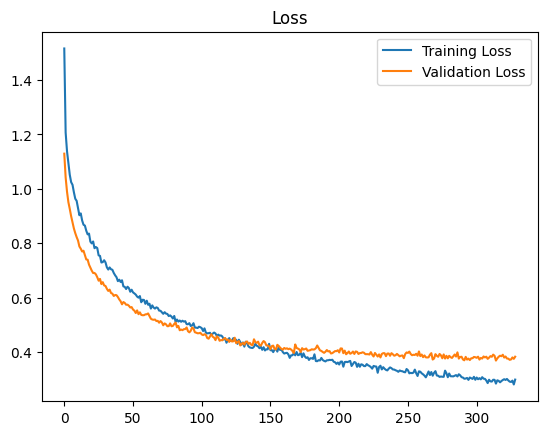

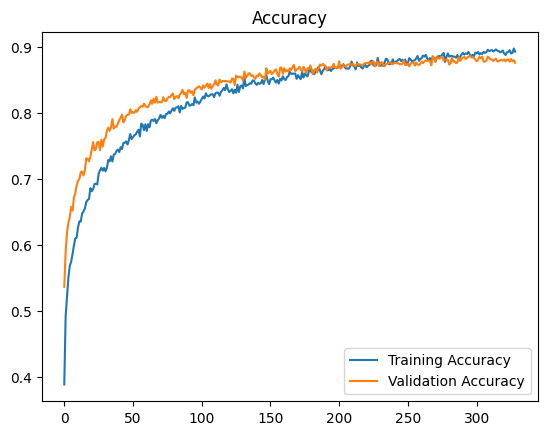

In [ ]:
plot_metrics(history)

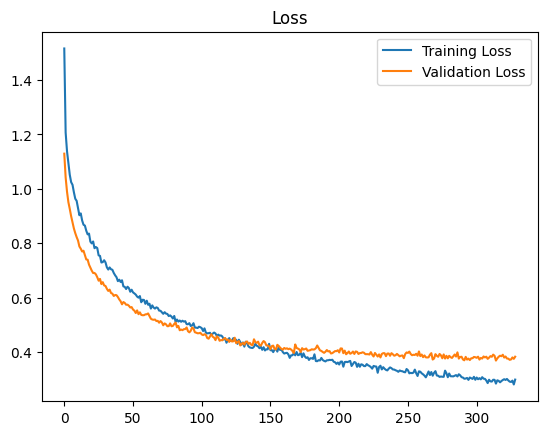

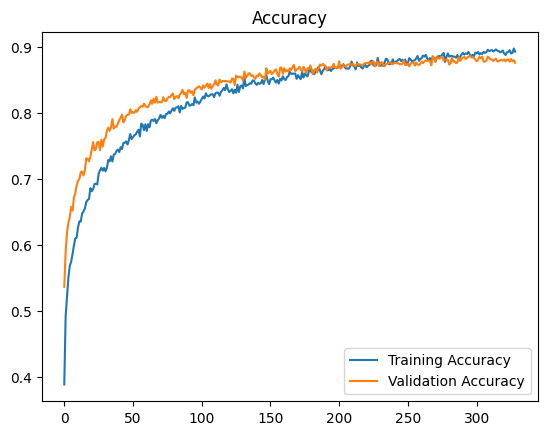

In [ ]:
plot_metrics(history)

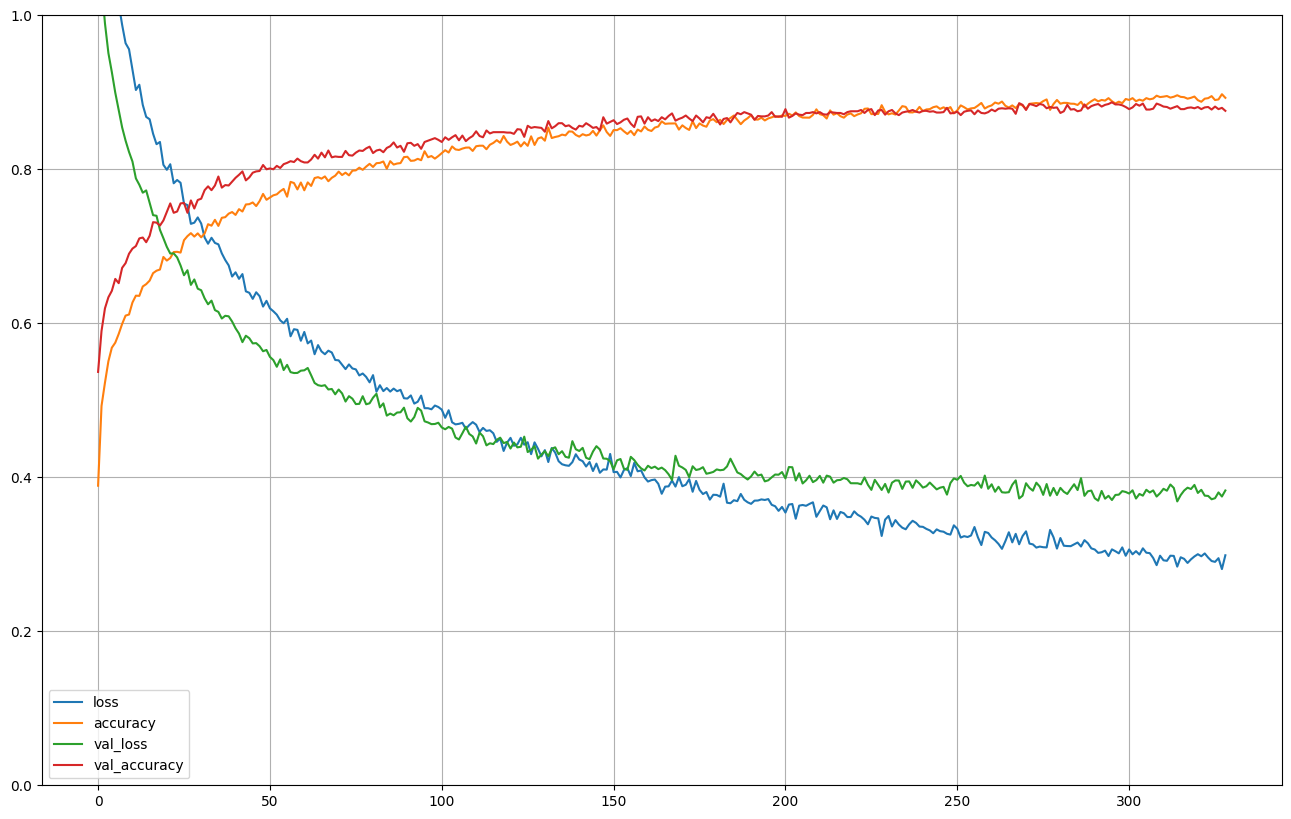

In [ ]:
model_loss.plot (figsize = (16,10))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [ ]:
Model_evaluation = model.evaluate(X_train, y_train)
print(f"%\nAccuracy: {Model_evaluation[1]*100:.4f} %")

226/226 [==============================] - 37s 163ms/step - loss: 0.0662 - accuracy: 0.9824
%
Accuracy: 98.2410 %


In [ ]:
Model_evaluation = model.evaluate(X_test, y_test)
print(f"%\nAccuracy: {Model_evaluation[1]*100:.4f} %")

57/57 [==============================] - 9s 161ms/step - loss: 0.3829 - accuracy: 0.8759
%
Accuracy: 87.5900 %


In [ ]:
Model_evaluation = model.evaluate(X_test, y_test)
print(f"%\nAccuracy: {Model_evaluation[1]*100:.4f} %")

57/57 [==============================] - 9s 162ms/step - loss: 0.3829 - accuracy: 0.8759
%
Accuracy: 87.5900 %


In [ ]:
y_predicted_tf = model.predict(X_test)

57/57 [==============================] - 19s 154ms/step


In [ ]:
y_predicted_tf

array([[9.9964285e-01, 1.5817744e-05, 3.3978469e-04, 1.0171932e-06,
        4.6575431e-07],
       [6.7561236e-04, 9.5586550e-01, 1.9117802e-02, 4.6856962e-03,
        1.9655384e-02],
       [4.9056848e-07, 9.9555102e-05, 7.5756377e-03, 7.2171690e-04,
        9.9160260e-01],
       ...,
       [4.7938465e-03, 9.8857540e-01, 2.8891398e-03, 1.0546180e-03,
        2.6870482e-03],
       [1.0000000e+00, 9.1926475e-09, 3.5892247e-09, 1.4685964e-09,
        1.9232771e-10],
       [1.9651285e-04, 2.5646735e-04, 2.3229571e-01, 7.5849146e-01,
        8.7599354e-03]], dtype=float32)

In [ ]:
y_test

array([0, 1, 4, ..., 1, 0, 2])

In [ ]:
y_predicted =[]
for i in range(1805):
    max_val = y_predicted_tf[i][0]
    classify = 0
    for j in range(5):
        if max_val<y_predicted_tf[i][j]:
            max_val = y_predicted_tf[i][j]
            classify = j
    y_predicted.append(classify)

In [ ]:
y_predicted

[0,
 1,
 4,
 4,
 0,
 1,
 1,
 3,
 0,
 1,
 0,
 4,
 1,
 3,
 0,
 4,
 0,
 1,
 3,
 2,
 2,
 3,
 4,
 3,
 4,
 0,
 1,
 3,
 0,
 3,
 0,
 1,
 1,
 1,
 2,
 3,
 3,
 3,
 3,
 0,
 2,
 2,
 4,
 2,
 3,
 2,
 0,
 2,
 1,
 4,
 1,
 2,
 2,
 0,
 3,
 1,
 1,
 0,
 1,
 0,
 3,
 1,
 4,
 3,
 3,
 3,
 2,
 1,
 4,
 0,
 0,
 2,
 4,
 3,
 1,
 4,
 2,
 0,
 3,
 3,
 3,
 3,
 4,
 0,
 3,
 2,
 3,
 4,
 1,
 2,
 3,
 0,
 1,
 3,
 1,
 0,
 2,
 3,
 1,
 3,
 0,
 2,
 4,
 1,
 4,
 1,
 2,
 4,
 1,
 4,
 1,
 1,
 3,
 4,
 2,
 1,
 1,
 1,
 0,
 0,
 2,
 2,
 3,
 0,
 1,
 1,
 0,
 2,
 0,
 1,
 4,
 3,
 1,
 2,
 1,
 1,
 0,
 3,
 1,
 1,
 0,
 1,
 1,
 3,
 0,
 3,
 0,
 1,
 2,
 0,
 3,
 3,
 2,
 1,
 3,
 3,
 3,
 3,
 2,
 0,
 3,
 3,
 4,
 3,
 3,
 3,
 4,
 0,
 3,
 2,
 0,
 3,
 3,
 4,
 4,
 1,
 0,
 0,
 4,
 3,
 0,
 3,
 0,
 0,
 1,
 1,
 3,
 4,
 0,
 4,
 4,
 2,
 2,
 3,
 1,
 3,
 1,
 2,
 0,
 0,
 4,
 0,
 4,
 4,
 0,
 1,
 3,
 4,
 1,
 4,
 3,
 1,
 1,
 4,
 0,
 0,
 0,
 3,
 4,
 1,
 0,
 4,
 4,
 0,
 2,
 4,
 0,
 0,
 1,
 4,
 1,
 1,
 1,
 1,
 4,
 3,
 2,
 2,
 1,
 3,
 1,
 1,
 4,
 0,
 1,
 1,
 3,
 2,
 4,
 0,


In [ ]:
len(y_predicted)

1805

In [ ]:
len(y_test)

1805

In [64]:
df = pd.DataFrame({"Y_test": y_test , "Y_predicted" : y_predicted})
df.head(100)

Y_test  Y_predicted
0        0            0
1        1            1
2        4            4
3        4            4
4        0            0
..     ...          ...
95       0            0
96       2            2
97       3            3
98       1            1
99       3            3

[100 rows x 2 columns]

from matplotlib import pyplot as plt
_df_0['Y_test'].plot(kind='hist', bins=20, title='Y_test')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Y_predicted'].plot(kind='hist', bins=20, title='Y_predicted')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2.plot(kind='scatter', x='Y_test', y='Y_predicted', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['Y_test'].plot(kind='line', figsize=(8, 4), title='Y_test')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_4['Y_predicted'].plot(kind='line', figsize=(8, 4), title='Y_predicted')
plt.gca().spines[['top', 'right']].set_visible(False)

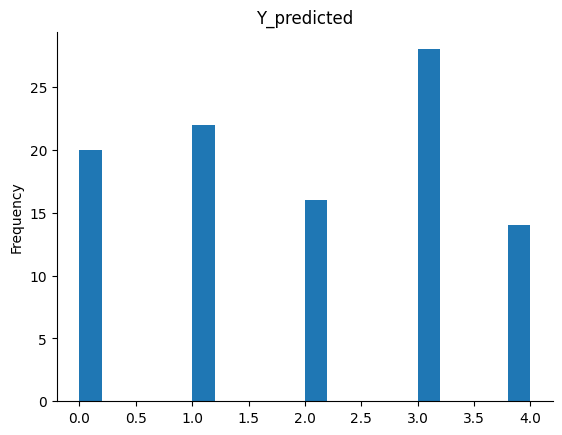

In [65]:
from matplotlib import pyplot as plt
_df_1['Y_predicted'].plot(kind='hist', bins=20, title='Y_predicted')
plt.gca().spines[['top', 'right',]].set_visible(False)

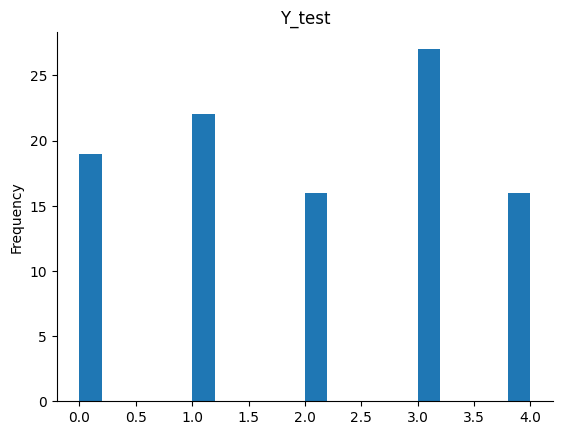

In [66]:
from matplotlib import pyplot as plt
_df_0['Y_test'].plot(kind='hist', bins=20, title='Y_test')
plt.gca().spines[['top', 'right',]].set_visible(False)

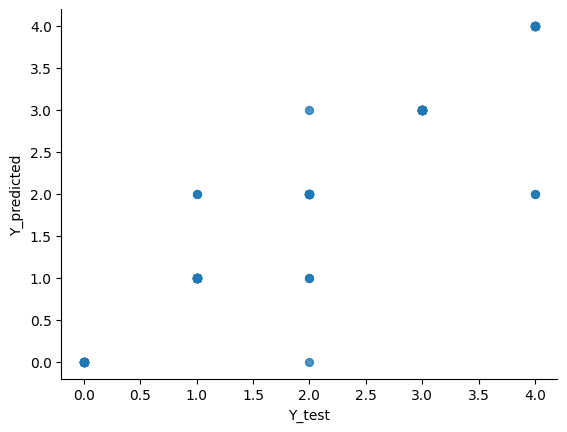

In [67]:
from matplotlib import pyplot as plt
_df_2.plot(kind='scatter', x='Y_test', y='Y_predicted', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
from matplotlib import pyplot as plt
_df_2.plot(kind='scatter', x='Y_test', y='Y_predicted', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

NameError: ignored

In [ ]:
from matplotlib import pyplot as plt
_df_1['Y_predicted'].plot(kind='hist', bins=20, title='Y_predicted')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
from matplotlib import pyplot as plt
_df_0['Y_test'].plot(kind='hist', bins=20, title='Y_test')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
from matplotlib import pyplot as plt
_df_4['Y_predicted'].plot(kind='line', figsize=(8, 4), title='Y_predicted')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
from matplotlib import pyplot as plt
_df_3['Y_test'].plot(kind='line', figsize=(8, 4), title='Y_test')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
from matplotlib import pyplot as plt
_df_2.plot(kind='scatter', x='Y_test', y='Y_predicted', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
from matplotlib import pyplot as plt
_df_1['Y_predicted'].plot(kind='hist', bins=20, title='Y_predicted')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
from matplotlib import pyplot as plt
_df_0['Y_test'].plot(kind='hist', bins=20, title='Y_test')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [68]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, recall_score, precision_score, f1_score

In [69]:
f1_score(y_test, y_predicted, average='micro')

0.8759002770083104

In [70]:
recall_score(y_test, y_predicted, average='micro')

0.8759002770083103

In [71]:
 precision_score(y_test, y_predicted, average='micro')

0.8759002770083103

In [72]:
cm = confusion_matrix(y_test, y_predicted)
print(cm)

[[340   8   8   0   5]
 [  8 328   6   6  13]
 [ 17  28 263  28  25]
 [  1   0   8 348   4]
 [  0  13  24  22 302]]


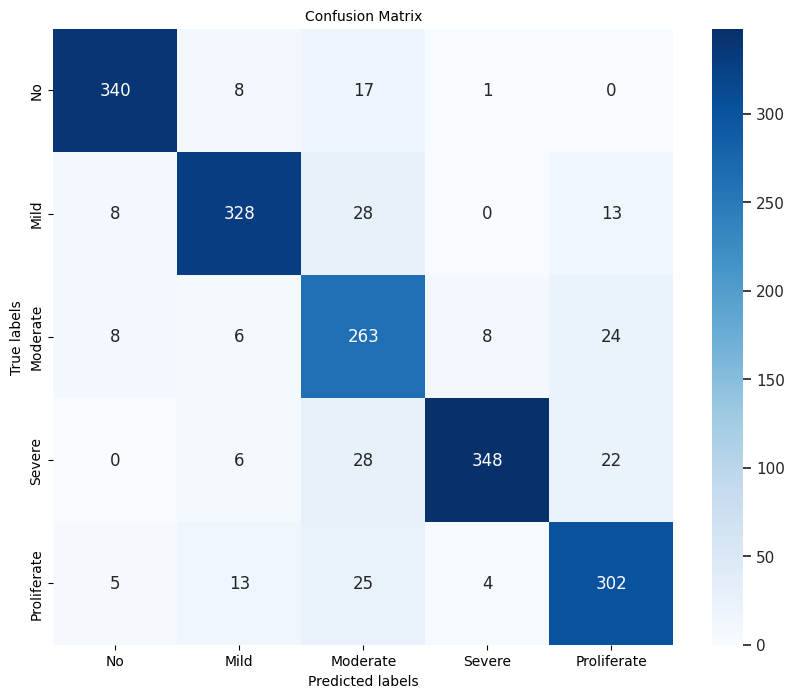

In [73]:
cm = confusion_matrix(y_predicted,y_test)

plt.figure(figsize=(10, 8))
ax = plt.subplot()
sns.set(font_scale=1.0)
sns.heatmap(cm, annot=True, fmt='g', cmap="Blues", ax=ax);

# labels, title and ticks
ax.set_xlabel('Predicted labels', fontsize=10);ax.set_ylabel('True labels', fontsize=10);
ax.set_title('Confusion Matrix', fontsize=10);
ax.xaxis.set_ticklabels(['No','Mild','Moderate','Severe','Proliferate'], fontsize=10); ax.yaxis.set_ticklabels(['No','Mild','Moderate','Severe','Proliferate'], fontsize=10);